# Module 1 Homework

Charles Gagnon, U00316286

0. Download Anaconda for Python or R
1. Copy the data in Problem 2.8 into a CSV file
2. Import your CSV file and create a dataframe
3. Describe your dataframe (statistically and in words)
4. Normalize your dataframe
5. Create a scatter plot of your data. Include both the interpolated and regular plots.
6. Split your data into 60% training and 40% validation
7. Upload your Jupyter notebook or simply a text file of your code.


In [1]:
# Imports
import pandas as pd

Next we import "prob_2.8.csv" in the /income/ dataframe.
The data in the CSV is from Table 2.18 (Shmueli).

| Field         | Description                 |
| ------------- | --------------------------- |
| AGE           | Age in years                |
| INCOME        | Income in US dollars (USD)  |

References:

Shmueli, Galit,Bruce, Peter C.,Gedeck, Peter,Patel, Nitin R.. Data Mining for Business Analytics (Kindle Locations 1595-1597). Wiley. Kindle Edition. 

In [27]:
# income dataframe 
income_df = pd.read_csv('prob_2.8.csv')
income_df.describe()

,Age,Income
count,6.000000,6.000000
mean,44.666667,98666.666667
std,14.975536,62867.055495
min,25.000000,39000.000000
25%,34.250000,51000.000000
50%,45.000000,78000.000000
75%,54.250000,141750.000000
max,65.000000,192000.000000


In [36]:
# We'll need the DataFrame sorted by age
income_df = income_df.sort_values('Age')
income_df

,Age,Income
0,25,49000
3,32,192000
4,41,39000
5,49,57000
1,56,156000
2,65,99000


In [46]:
# Normalizing a data frame
income_df['Norm_Income'] = (income_df['Income'] - income_df['Income'].mean()) / income_df['Income'].std()
income_df

,Age,Income,Norm_Income
0,25,49000,-0.790027
3,32,192000,1.484614
4,41,39000,-0.949093
5,49,57000,-0.662774
1,56,156000,0.911977
2,65,99000,0.005302


<AxesSubplot:xlabel='Age', ylabel='Income'>

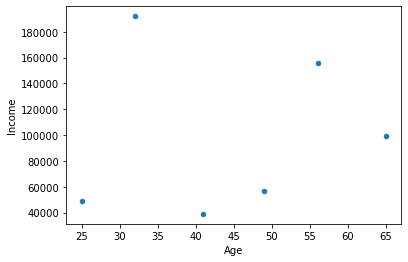

In [47]:
## scatter plot with axes names
income_df.plot.scatter(x='Age', y='Income', legend=False)

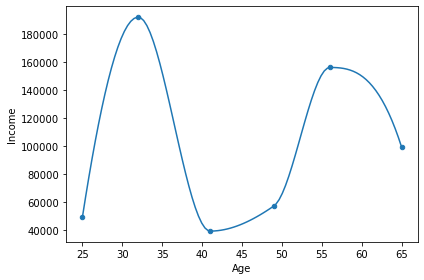

In [48]:
x = list(income_df.Age)
y = list(income_df.Income)

import numpy as np
from scipy import interpolate
import matplotlib.pylab as plt

f = interpolate.PchipInterpolator(x, y)

x_new = np.linspace(x[0], x[-1], 100)
y_new = [f(xi) for xi in x_new]

income_df.plot.scatter(x='Age', y='Income')
plt.plot(x_new, y_new)
plt.tight_layout()  # Increase the separation between the plots
plt.show()

In [49]:
from sklearn.model_selection import train_test_split 

# training (60%) and validation (40%)
trainIncome, validIncome = train_test_split(income_df, test_size=0.40, random_state=1)
print('Training : ', trainIncome.shape)
print('Validation : ', validIncome.shape)

Training :  (3, 3)
Validation :  (3, 3)
